In [1]:
import numpy as np
import torch
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def decode_img(img):
    """
    Takes a tensor of dim (20, 51) and returns PIL image.
    """
    return Image.fromarray(
        (np.concatenate(
            (img.numpy().reshape(20, 51, 1), 
             np.full((20, 51, 1), 1)
            ),axis=2)*255).astype('uint8')
    )

In [3]:
class GeneratorNet(torch.nn.Module):
    """
    This code is largely adapted from the GitHub code.
    My output dimensions are different (1020 features),
    otherwise I keep the same model structure.
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 1020
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

In [4]:
g = GeneratorNet()
g.load_state_dict(torch.load("models/generator8000"))
g.eval()

GeneratorNet(
  (hidden0): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden1): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden2): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (out): Sequential(
    (0): Linear(in_features=1024, out_features=1020, bias=True)
    (1): Sigmoid()
  )
)

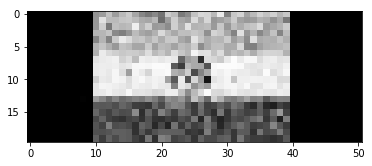

In [88]:
image = decode_img(g(torch.empty(100).normal_(0,1)).view(20,51).detach())
plt.figure()
plt.imshow(image)